In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/data_penjualan.csv')

In [4]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [5]:
df.set_index('order_date', inplace=True)

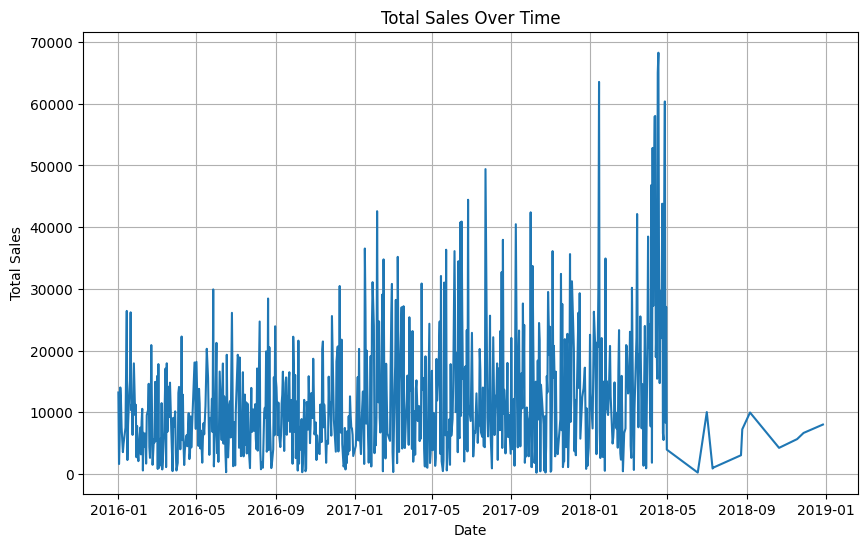

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(df['total_sales'])
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

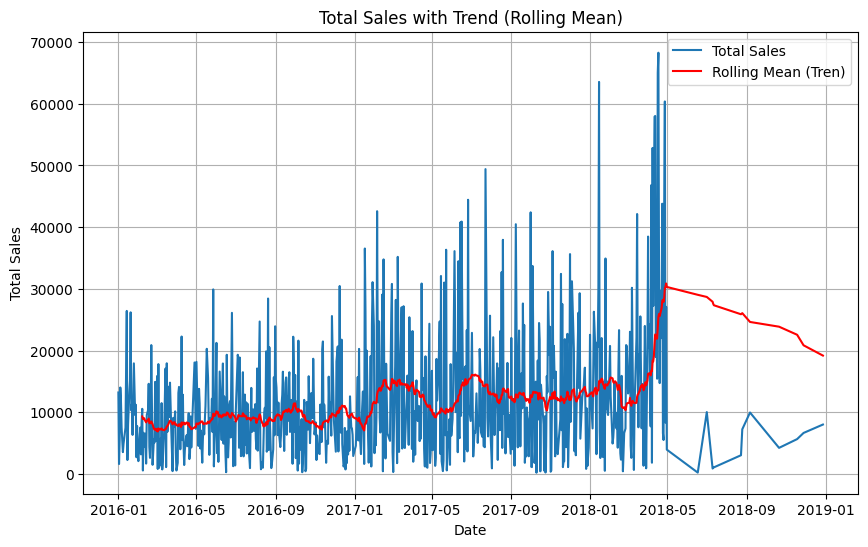

In [9]:
# Menghitung rolling mean dengan window 30 hari (untuk data harian)
df['rolling_mean'] = df['total_sales'].rolling(window=30).mean()

# Plot total sales dengan rolling mean
plt.figure(figsize=(10, 6))
plt.plot(df['total_sales'], label='Total Sales')
plt.plot(df['rolling_mean'], label='Rolling Mean (Tren)', color='red')
plt.title('Total Sales with Trend (Rolling Mean)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

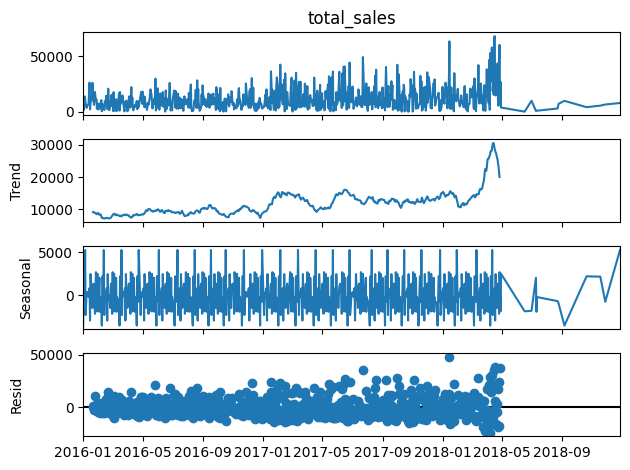

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Melakukan dekomposisi time series (additive model)
decomposition = seasonal_decompose(df['total_sales'], model='additive', period=30)

# Plot komponen dekomposisi
decomposition.plot()
plt.show()

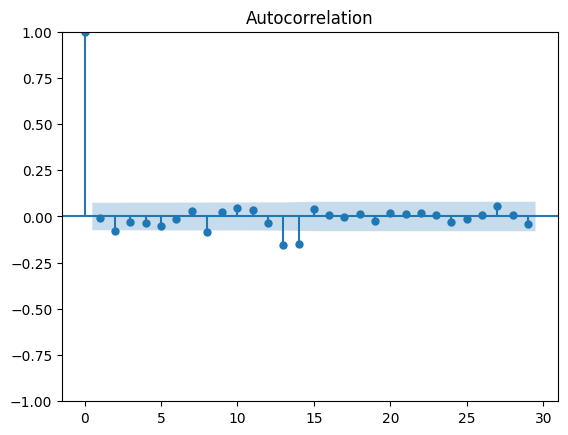

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF untuk melihat pola residual (noise)
residuals = decomposition.resid.dropna()
plot_acf(residuals)
plt.show()